In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv("data/ASML_v1.csv", index_col=0)
df

,Date,Open,High,Low,Close,Adj Close,Volume,obv,ma6,ma10,rsi6,rsi10,macd,dif,atr10,atr20,bias6,bias10,tapi
0,2016-11-17,101.239998,102.849998,101.190002,102.559998,97.645622,1344700,1344700,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,13111.349710
1,2016-11-18,103.580002,104.750000,103.379997,104.589996,99.578346,1914300,3259000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,18302.897726
2,2016-11-21,104.089996,105.110001,104.019997,105.089996,100.054390,1408200,4667200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,13399.943416
3,2016-11-22,105.449997,105.610001,104.800003,105.320000,100.273384,876300,5543500,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,8320.357007
4,2016-11-23,104.480003,105.349998,104.250000,105.099998,100.063911,432300,5111200,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,4113.225578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-11-10,829.609985,835.440002,815.109985,817.849976,817.849976,737700,86884600,840.889994,829.088001,43.364854,51.307540,14.121893,4.518819,19.559911,20.038150,-3.840003,-1.123802,901.999171
1254,2021-11-11,833.270020,839.039978,829.200012,833.390015,833.390015,416000,87300600,841.451660,831.108002,55.059322,57.428905,13.815968,3.370316,19.722920,20.095742,-1.343608,0.228201,499.166048
1255,2021-11-12,840.000000,855.000000,835.099976,851.630005,851.630005,531200,87831800,841.641663,834.983002,65.184828,63.425384,14.873879,3.542582,19.911627,20.171455,1.664724,1.664700,623.745050
1256,2021-11-15,855.000000,861.599976,852.989990,856.719971,856.719971,638000,88469800,843.261658,839.909998,67.627289,64.955921,15.939261,3.686371,18.917461,19.661380,2.243052,1.680997,744.700744


In [3]:
sel = VarianceThreshold(0)
sel.fit_transform(df.drop(["Date"],axis=1))

array([[1.01239998e+02, 1.02849998e+02, 1.01190002e+02, ...,
                   nan,            nan, 1.31113497e+04],
       [1.03580002e+02, 1.04750000e+02, 1.03379997e+02, ...,
                   nan,            nan, 1.83028977e+04],
       [1.04089996e+02, 1.05110001e+02, 1.04019997e+02, ...,
                   nan,            nan, 1.33999434e+04],
       ...,
       [8.40000000e+02, 8.55000000e+02, 8.35099976e+02, ...,
        1.66472369e+00, 1.66470031e+00, 6.23745050e+02],
       [8.55000000e+02, 8.61599976e+02, 8.52989990e+02, ...,
        2.24305217e+00, 1.68099732e+00, 7.44700744e+02],
       [8.51520020e+02, 8.62609985e+02, 8.47239990e+02, ...,
        2.58638847e+00, 1.57869934e+00, 8.01812805e+02]])

In [4]:
df.dropna(inplace=True)

In [5]:
scaler = StandardScaler()
scaler.fit(df.drop(["Date"],axis=1))
X=scaler.transform(df.drop(["Date"],axis=1))

In [6]:
model = PCA(n_components=18).fit(X)
X_pc = model.transform(X)

n_pcs= model.components_.shape[0]

initial_feature_names = list(df.columns)
initial_feature_names.remove('Date')

In [19]:
# Rank the lists withn each pc

feat_rank = [np.abs(model.components_[i]).argsort() for i in range(n_pcs)]
dic_rank = {'PC{}'.format(i): [initial_feature_names[feat_rank[i][j]] for j in range(len(initial_feature_names))][::-1] for i in range(n_pcs)}

In [77]:
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}


In [78]:
most_important_names

['Adj Close',
 'rsi6',
 'Volume',
 'macd',
 'dif',
 'bias6',
 'obv',
 'atr10',
 'tapi',
 'bias10',
 'rsi10',
 'atr20',
 'Open',
 'Low',
 'High',
 'Adj Close',
 'Close',
 'ma10']

In [86]:
most_important_names = list(dict.fromkeys(most_important_names))

## Featue correlation distance

In [38]:
corr_matrix = df.corr(method ='kendall')

In [39]:
corr_matrix

,Open,High,Low,Close,Adj Close,Volume,obv,ma6,ma10,rsi6,rsi10,macd,dif,atr10,atr20,bias6,bias10,tapi
Open,1.000000,0.986662,0.984108,0.976774,0.975138,-0.022540,0.887958,0.962956,0.948642,0.084054,0.095483,0.367430,0.072808,0.677066,0.683730,0.148325,0.198772,-0.567929
High,0.986662,1.000000,0.983541,0.985054,0.982393,-0.018933,0.890055,0.963058,0.949097,0.086285,0.096833,0.365805,0.072731,0.681197,0.687400,0.152141,0.201532,-0.564473
Low,0.984108,0.983541,1.000000,0.986561,0.983340,-0.028305,0.889612,0.958016,0.944156,0.092506,0.103409,0.369372,0.076810,0.671428,0.679202,0.157434,0.206905,-0.573856
Close,0.976774,0.985054,0.986561,1.000000,0.992809,-0.024198,0.890942,0.957697,0.944226,0.094253,0.104209,0.367235,0.076147,0.675821,0.682957,0.160374,0.208899,-0.569827
Adj Close,0.975138,0.982393,0.983340,0.992809,1.000000,-0.025649,0.887018,0.958131,0.945456,0.091838,0.101404,0.364437,0.074908,0.675722,0.683029,0.158785,0.206781,-0.571228
Volume,-0.022540,-0.018933,-0.028305,-0.024198,-0.025649,1.000000,-0.004095,-0.018518,-0.015315,-0.080726,-0.104641,-0.104356,-0.034922,0.135816,0.108436,-0.044617,-0.050657,0.454405
obv,0.887958,0.890055,0.889612,0.890942,0.887018,-0.004095,1.000000,0.883741,0.880150,0.080004,0.086868,0.347804,0.066773,0.695055,0.705416,0.150306,0.195780,-0.542610
ma6,0.962956,0.963058,0.958016,0.957697,0.958131,-0.018518,0.883741,1.000000,0.975349,0.058190,0.072641,0.363105,0.052941,0.680403,0.686005,0.118047,0.170292,-0.563303
ma10,0.948642,0.949097,0.944156,0.944226,0.945456,-0.015315,0.880150,0.975349,1.000000,0.042353,0.056116,0.349664,0.032734,0.686746,0.691788,0.109707,0.153100,-0.559511
rsi6,0.084054,0.086285,0.092506,0.094253,0.091838,-0.080726,0.080004,0.058190,0.042353,1.000000,0.824535,0.338756,0.501768,-0.038526,-0.024601,0.587285,0.683595,-0.125166


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

<AxesSubplot:>

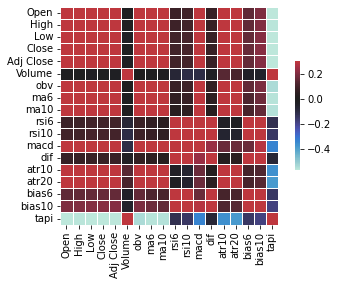

In [42]:
sns.heatmap(corr_matrix, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [43]:
abs_corr_matrix = np.abs(corr_matrix)

<AxesSubplot:>

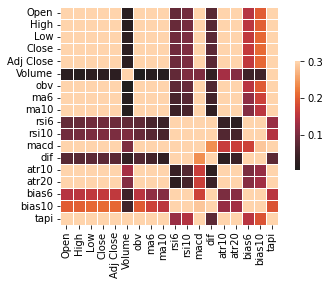

In [45]:
sns.heatmap(abs_corr_matrix, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [49]:
import scipy
import scipy.cluster.hierarchy as sch

In [82]:
def cluster_corr(corr_array):
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    return idx_to_cluster_array

def sort_corr_cluster(corr_array, inplace=False):
    idx_to_cluster_array = cluster_corr(corr_array)
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :]
    return corr_array[idx, :][:, idx]

def cluster_features(cluster_idx, feature_names):
    cluster_dict = {}
    for cluster, feature in zip(cluster_idx, feature_names):
        if cluster in cluster_dict:
            cluster_dict[cluster].append(feature)
        else:
            cluster_dict[cluster] = [feature]
    return cluster_dict

<AxesSubplot:>

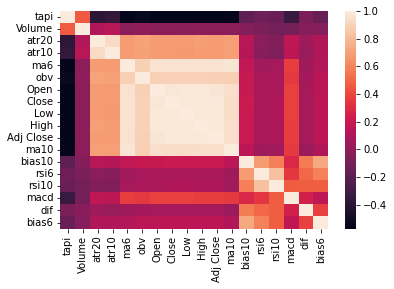

In [67]:
sns.heatmap(sort_corr_cluster(corr_matrix))

<AxesSubplot:>

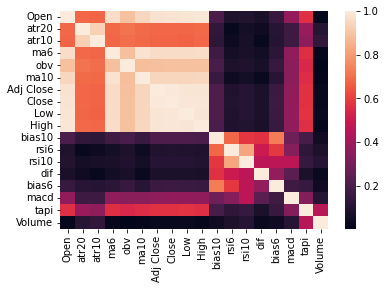

In [64]:
sns.heatmap(sort_corr_cluster(abs_corr_matrix))

In [84]:
cluster_ids = cluster_corr(abs_corr_matrix)

clustered_features = cluster_features(cluster_ids, initial_feature_names)



In [94]:
def extract_key_features(clustered_features, most_important_names):
    key_features = []
    for c in clustered_features:
        name_id = min([most_important_names.index(i) for i in clustered_features[c] if i in  most_important_names])
        key_features.append(most_important_names[name_id])
    return key_features

In [88]:
clustered_features

{1: ['Open',
  'High',
  'Low',
  'Close',
  'Adj Close',
  'obv',
  'ma6',
  'ma10',
  'atr10',
  'atr20'],
 4: ['Volume'],
 2: ['rsi6', 'rsi10', 'dif', 'bias6', 'bias10'],
 3: ['macd', 'tapi']}

In [92]:
most_important_names

['Adj Close',
 'rsi6',
 'Volume',
 'macd',
 'dif',
 'bias6',
 'obv',
 'atr10',
 'tapi',
 'bias10',
 'rsi10',
 'atr20',
 'Open',
 'Low',
 'High',
 'Close',
 'ma10']

In [95]:
extract_key_features(clustered_features, most_important_names)

['Adj Close', 'Volume', 'rsi6', 'macd']